<a href="https://colab.research.google.com/github/johnwesleyharding/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/JWH_assignment_DS_114_Make_Explanatory_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from bs4 import BeautifulSoup
plt.style.use('fivethirtyeight')
# matplotlib.pyplot.style.use('fivethirtyeight')

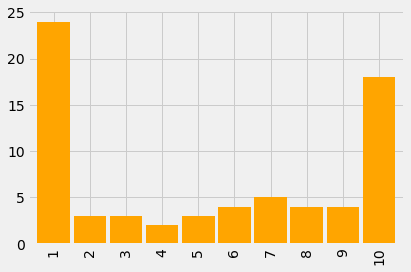

In [3]:
fake = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake.value_counts().sort_index().plot.bar(color = 'orange', width = 0.9)
plt.show()

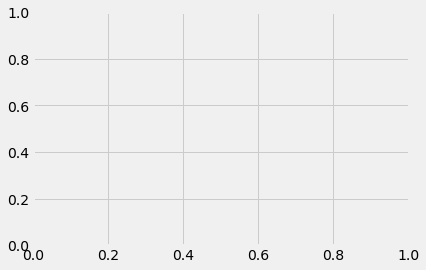

In [4]:
fig, ax = plt.subplots()
plt.show()

2) Reproduce another example from FiveThityEight's shared data repository.
WARNING: There are a lot of very custom graphs and tables at the above link. I highly recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, seaborn relplot, etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib.

If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought.

If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.

In [5]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2019/07/mehta.trump_.text-1.png'
example = Image(url=url, width=400)

display(example)

In [9]:
from google.colab import files
upload = files.upload()

Saving index.csv to index.csv


In [10]:
email = pd.read_csv('index.csv')
print(email.shape)
email.head()

(830, 7)


,candidate,message_id,message_date,message_from,message_subject,filepath,url
0,Steve Bullock,16b91b0264861699,2019-06-25 22:49:28,Steve Bullock HQ <info@stevebullock.com>,Please:,emails/steve_bullock/16b91b0264861699.html,https://fivethirtyeight.github.io/candidate-em...
1,Amy Klobuchar,16b918b67db5a5cf,2019-06-25 22:09:17,"""Tim Hogan, Communications Director"" <info@amy...",Can I recruit you for something? (Debate rapid...,emails/amy_klobuchar/16b918b67db5a5cf.html,https://fivethirtyeight.github.io/candidate-em...
2,Jay Inslee,16b913178e074b12,2019-06-25 20:31:05,"""Jay Inslee"" <hello@jayinslee.com>",A time I was embarrassed,emails/jay_inslee/16b913178e074b12.html,https://fivethirtyeight.github.io/candidate-em...
3,Michael Bennet,16b91189e084d570,2019-06-25 20:03:58,Bennet Outreach Team <info@michaelbennet.com>,the naysayers are at it again,emails/michael_bennet/16b91189e084d570.html,https://fivethirtyeight.github.io/candidate-em...
4,Joe Biden,16b911021f72689d,2019-06-25 19:54:41,Biden 2020 <info@joebiden.com>,BREAKING NEWS -- please read asap,emails/joe_biden/16b911021f72689d.html,https://fivethirtyeight.github.io/candidate-em...


In [11]:
print(email['filepath'][0])

emails/steve_bullock/16b91b0264861699.html


In [0]:
#table = BeautifulSoup(open('emails/steve_bullock/16b91b0264861699.html','r').read()).find('table')
#string = pd.read_html(table) 

In [0]:
fakeemail = pd.DataFrame(email['candidate'].value_counts())
fakeemail.reset_index(inplace = True)
fakeemail.columns = ['candidate', 'emails']

In [0]:
def lastname(name):
  return ' '.join(name.split()[1:])

fakeemail['name'] = fakeemail['candidate'].apply(lastname)

fakeemail['trump'] = [0, 14, 26, 60, 12, 4, 11, 10, 14, 17, 10, 9, 12, 11, 7, 4, 1, 1, 4, 5, 0, 0]

In [0]:
fakeemail.sort_values(['trump', 'emails'], ascending = False, inplace = True)

In [0]:
fakeemail = fakeemail.append({'candidate': 'Seth Moulton', 'emails': 0, 'trump': 0, 'name': 'Moulton'}, ignore_index = True)

In [0]:
text = 'Includes all emails sent between May 25 and June 25, 2019, by all candidates that FiveThirtyEight considers "major," except Joe Sestak, who entered the race on June 23.  We excluded phrases (like headers and footers) that appeared in every email from a candidate and are more than 50 characters and four words long.  Steve Bullock mentioned Trump in a header that appeared in many but not all of his emails, so it was not excluded.  If a candidate replied to or forwarded their own email back to a reader and that email contained the word "Trump," both the original email and the reply or forward were counted as emails mentioning "Trump."'

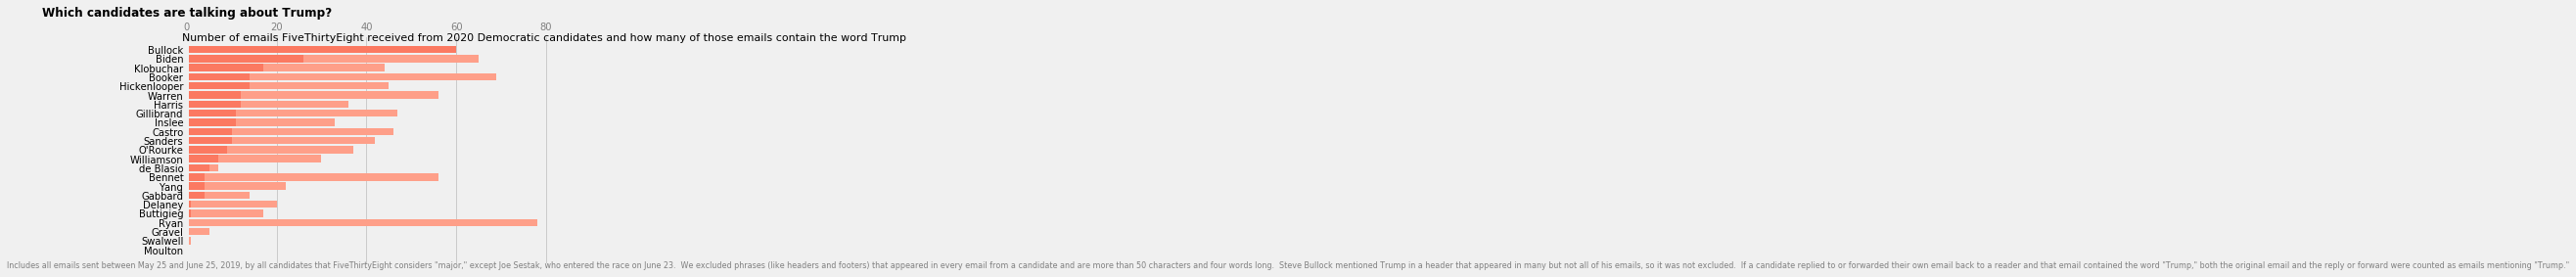

In [23]:
fig, ax = plt.subplots()

candidates = fakeemail['name']
y_pos = np.arange(len(candidates))
email = fakeemail['emails']
trump = fakeemail['trump']

ax.yaxis.grid(False)
ax.barh(y_pos, email, align = 'center', color = '#FE9F89', height = .8)
ax.barh(y_pos, trump, align = 'center', color = '#FB7961', height = .8)
ax.set_yticks(y_pos)
ax.set_yticklabels(candidates, fontsize = 10)
ax.set_xticklabels([0, 20, 40, 60, 80], fontsize = 10, color = '.5')
ax.invert_yaxis()
ax.xaxis.tick_top()
#ax.yaxis.set_visible(False)
ax.text(s='Number of emails FiveThirtyEight received from 2020 Democratic candidates and how many of those emails contain the word Trump', x = -1, y = -1, fontsize = 11, wrap = True)
ax.set_title('Which candidates are talking about Trump?', x = 0, fontsize = 12, fontweight='bold')
#ax.set_title('Number of emails FiveThirtyEight received from 2020 Democratic candidates and how many of those emails contain the word Trump', x = 0, fontsize = 11, wrap = True)

# ??? ax.set_yticks(y_pos)
#ind = np.arange(N)    # the x locations for the groups

    #ax.xaxis.set_visible(False)
    #ax.set_xlim(0, np.sum(data, axis=1).max())

# color = 'blue'
# ax.annotate('Spines', xy=(4.0, 0.35), xytext=(3.3, 0.1),
#             weight='bold', color=color,
#             arrowprops=dict(arrowstyle='->',
#                             connectionstyle="arc3",
#                             color=color))
ax.text(-40, 24, text, fontsize=8, color='.5', wrap = True) #ha="right", 

plt.show()
display(example)

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here